#### Titanic dataset
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons for the sinking of the Titanic was the lack of supplies and medical expertise. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, I build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data as explained below:

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|ticket| Ticket Number||
|fare| Passenger fare||
|cabin| Carbin Number||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|

The goal is to predict if a passenger survived the sinking of the Titanic or not (`survived`), regarding the passenger’s attributes. 

### 1. Import library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. EDA

In [46]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
titanic.shape

(891, 12)

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
titanic.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

**Problem 1: Missing value Age, Cabin, Embarkded**

In [51]:
pd.DataFrame(titanic.isna().sum()*100/len(titanic)).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467


**Problem 2: Variables are not on same scale and outliers**

[]

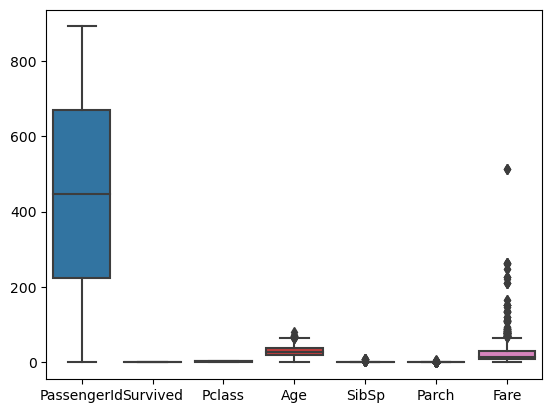

In [52]:
sns.boxplot(data=titanic) #swarmplot violinplot boxenplot
plt.plot()

[]

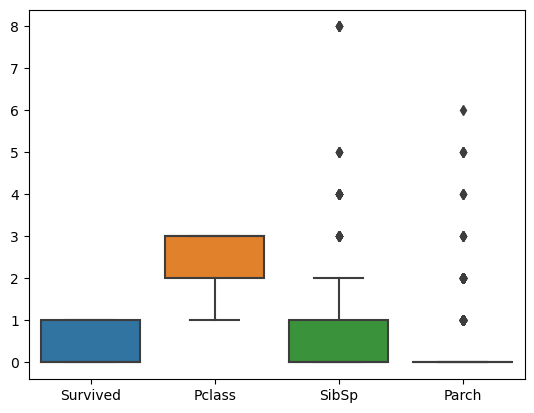

In [53]:
sns.boxplot(data=titanic.drop(columns=['PassengerId','Age','Fare'])) #swarmplot violinplot boxenplot
plt.plot()

**Problem 3: Imbalanced data**

In [54]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

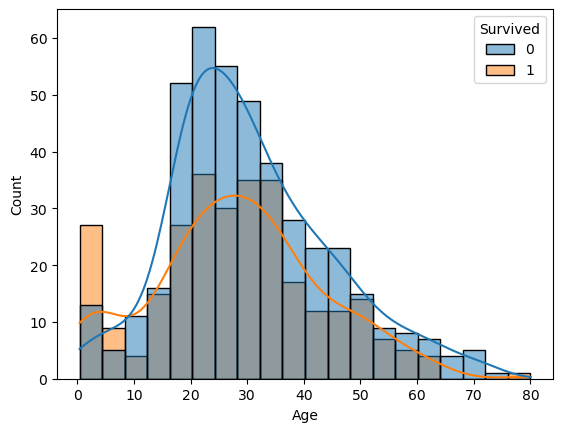

In [55]:
sns.histplot(data=titanic, x='Age', hue='Survived', kde=True)
plt.show()

### Data preprocessing 

1. Handle null values

In [56]:
titanic['Age'].mean(), titanic['Age'].median() 

(29.69911764705882, 28.0)

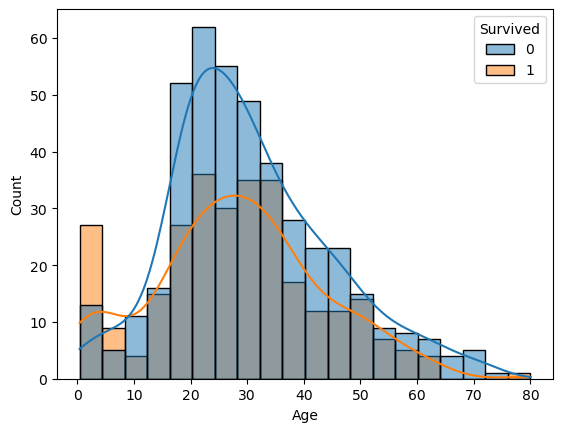

In [57]:
sns.histplot(data=titanic, x='Age', hue='Survived', kde=True)
plt.show()

In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
pd.DataFrame(titanic.groupby(['Sex','SibSp','Parch']).Age.agg([len, 'mean', lambda x: x.isna().sum()*100/len(x)]))

len       mean  <lambda_0>
Sex    SibSp Parch                            
female 0     0      126  30.150000   20.634921
             1       24  27.086957    4.166667
             2       20  20.705882   15.000000
             3        1  24.000000    0.000000
             4        1  29.000000    0.000000
             5        2  40.000000    0.000000
       1     0       63  31.806122   22.222222
             1       26  29.160000    3.846154
             2       11  21.200000    9.090909
             3        2  51.000000    0.000000
             4        1  45.000000    0.000000
             5        2  38.500000    0.000000
             6        1  43.000000    0.000000
       2     0        3  35.500000   33.333333
             1        5   6.900000    0.000000
             2        4  17.250000    0.000000
             3        1  24.000000    0.000000
       3     0        2  31.500000    0.000000
             1        5   5.500000   60.000000
             2        4  14.500000    0.000000
       4     2        6   8.333333    0.000000
       5     2        1  16.000000    0.000000
       8     2        3        NaN  100.000000
male   0     0      411  32.901316   26.034063
             1       14  33.530000    0.000000
             2        9  21.536667    0.000000
       1     0       60  32.311321   11.666667
             1       31  25.258621    6.451613
             2        8  19.417143   12.500000
             3        1  16.000000    0.000000
             4        2  52.000000    0.000000
             5        1  39.000000    0.000000
       2     0       13  31.181818   15.384615
             1        2  12.000000    0.000000
       3     1        2   2.000000   50.000000
             2        3  11.000000    0.000000
       4     1        9   6.777778    0.000000
             2        3   5.333333    0.000000
       5     2        4   8.750000    0.000000
       8     2        4        NaN  100.000000

In [60]:
titanic.Age.isna().sum()

177

In [63]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
titanic['Age'] = titanic.groupby(['Sex','SibSp','Parch']).Age.apply(lambda x: x.fillna(x.mean())) #891
titanic.Age.isna().sum()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py", line 11615, in _reindex_for_setitem
    reindexed_value = value.reindex(index)._values
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py", line 4914, in reindex
    return super().reindex(
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py", line 5360, in reindex
    return self._reindex_axes(
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py", line 5375, in _reindex_axes
    new_index, indexer = ax.reindex(
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 4278, in reindex
    target = self._wrap_reindex_result(target, indexer, preserve_names)
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/multi.py", line 2490, in _wrap_reindex_result
    target = MultiIndex.from_tuples(target)
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/mu

In [64]:
aldult_avg_age = titanic[(titanic['Sex'] == 'female') | (titanic['Sex'] == 'male')].Age.mean()
aldult_avg_age

29.69911764705882

In [65]:
titanic['Age'] = titanic['Age'].fillna(aldult_avg_age)
titanic.Age.isna().sum()

0

In [68]:
titanic.Embarked.isna().sum()

2

In [69]:
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [70]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [71]:
ser = titanic[(titanic['Sex'] == 'female') & (titanic['Pclass'] ==1)]
ser

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000000,0,1,11767,83.1583,C50,C


In [72]:
titanic['Embarked'] = titanic['Embarked'].fillna(ser['Embarked'].value_counts().idxmax())
titanic.Embarked.isna().sum()

0

In [73]:
titanic.Cabin.isna().sum()/len(titanic) 

0.7710437710437711

In [74]:
titanic=titanic.drop(columns = 'Cabin')

2. Handle outliers

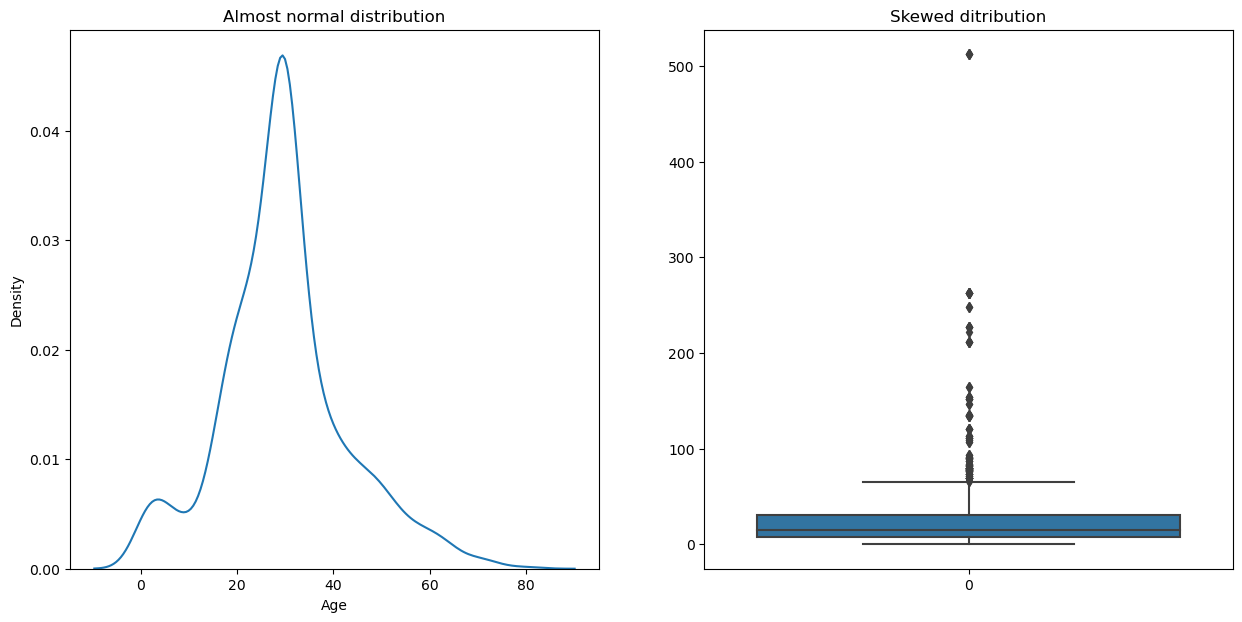

In [75]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
# Age ~ almost normal distribution
plt.title("Almost normal distribution")
sns.kdeplot(data=titanic['Age'])
# Fare
plt.subplot(1,2,2)
plt.title("Skewed ditribution")
sns.boxplot(data=titanic['Fare'])
plt.show()

    Trimming

In [76]:
# Define lower and upper limit
norm_upper_limit = titanic['Age'].mean() + 3*titanic['Age'].std()
norm_lower_limit = titanic['Age'].mean() - 3*titanic['Age'].std()
norm_upper_limit, norm_lower_limit

(68.70516332506747, -9.306928030949834)

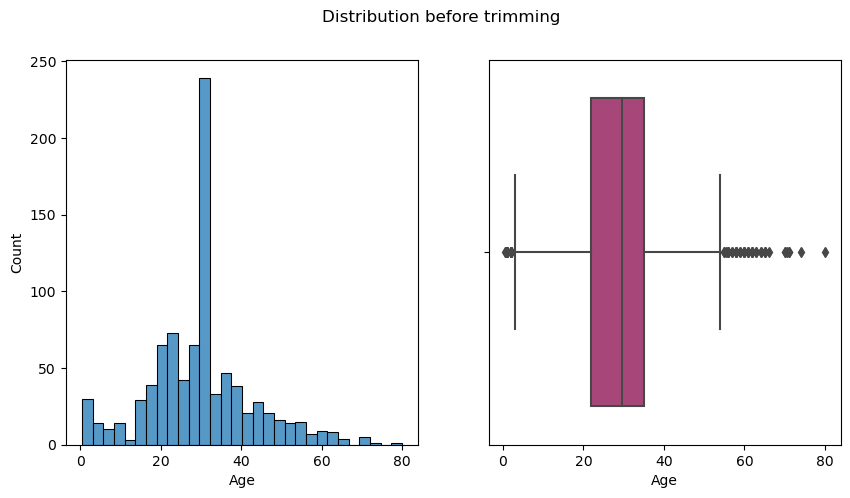

In [77]:
plt.figure(figsize = (10,5))
plt.suptitle("Distribution before trimming")
plt.subplot(1,2,1)
sns.histplot(data=titanic, x='Age')
plt.subplot(1,2,2)
sns.boxplot(data=titanic, x='Age', palette='magma')
plt.show()

In [78]:
df_normal_new = titanic[(titanic['Age'] > norm_lower_limit) & (titanic['Age'] < norm_upper_limit)]

In [79]:
len(titanic), len(df_normal_new)

(891, 884)

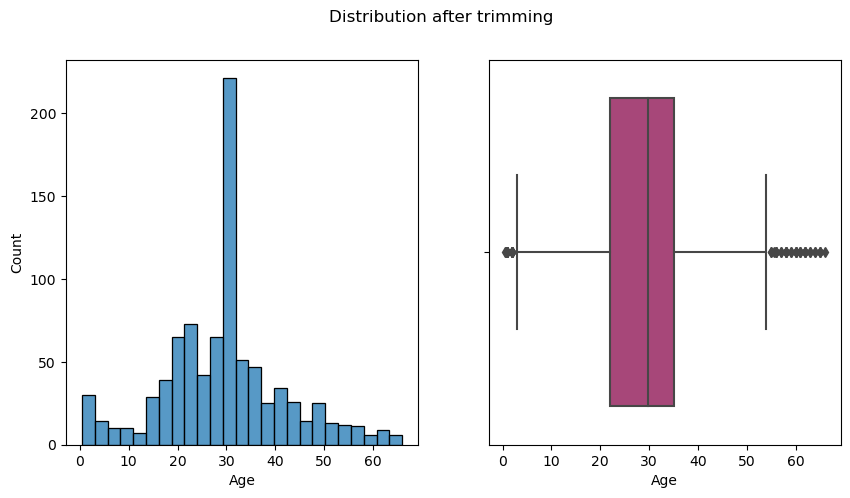

In [80]:
plt.figure(figsize = (10,5))
plt.suptitle("Distribution after trimming")
plt.subplot(1,2,1)
sns.histplot(data=df_normal_new, x='Age')
plt.subplot(1,2,2)
sns.boxplot(data=df_normal_new, x='Age', palette='magma')
plt.show()

    Capping

In [81]:
# Find Q1, 3
q1 = titanic['Fare'].quantile(0.25) #percentile()
q3 = titanic['Fare'].quantile(0.75)
# Calculate IOR
IQR = q3 - q1
# Define max min limit
max_limit = q3 + 1.5*IQR
min_limit = q1 - 1.5*IQR

In [82]:
df_skew_new = pd.DataFrame(np.where(titanic['Fare'] > max_limit, max_limit,
                                   (np.where(titanic['Fare'] < min_limit, min_limit, titanic['Fare']))), 
                           columns = ['Fare'])
df_skew_new.head(5)

,Fare
0,7.2500
1,65.6344
2,7.9250
3,53.1000
4,8.0500


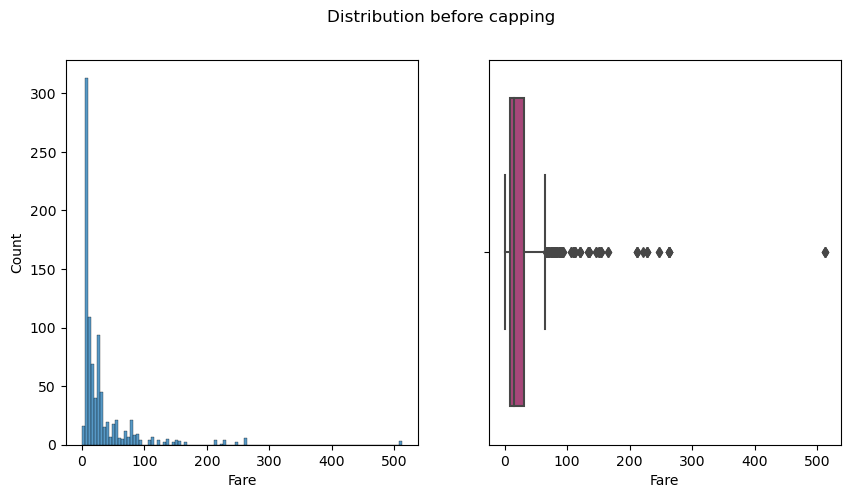

In [83]:
plt.figure(figsize = (10,5))
plt.suptitle("Distribution before capping")
plt.subplot(1,2,1)
sns.histplot(data=titanic, x='Fare')
plt.subplot(1,2,2)
sns.boxplot(data=titanic, x='Fare', palette='magma')
plt.show()

In [84]:
len(titanic), len(df_skew_new)

(891, 891)

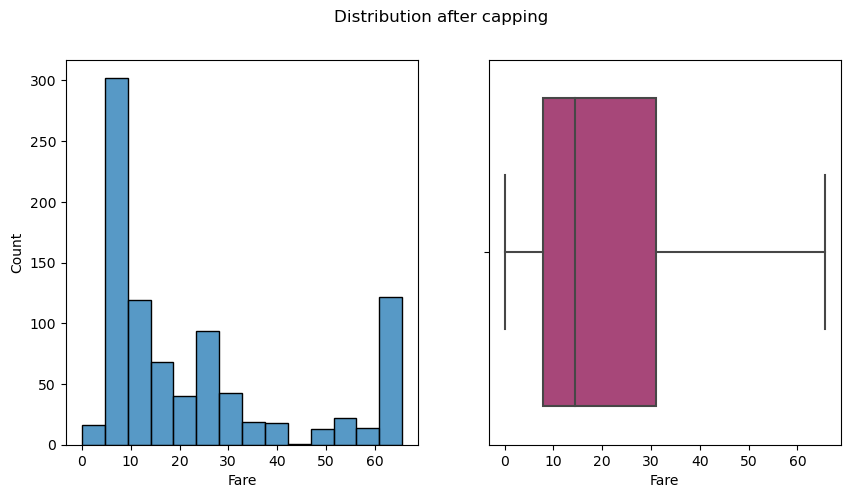

In [85]:
plt.figure(figsize = (10,5))
plt.suptitle("Distribution after capping")
plt.subplot(1,2,1)
sns.histplot(data=df_skew_new, x='Fare')
plt.subplot(1,2,2)
sns.boxplot(data=df_skew_new, x='Fare', palette='magma')
plt.show()

### 3.Scale data

sns.boxplot(data=titanic.drop(columns=['PassengerId','Age','Fare']));

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic['Fare'] = scaler.fit_transform(titanic[['Fare']])

### 4. Feature transformation

In [87]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,S


In [88]:
age_groups = [0, 15, 35, 45, 60, 80, 100]
titanic['age_group'] = pd.cut(titanic['Age'], bins=age_groups) 

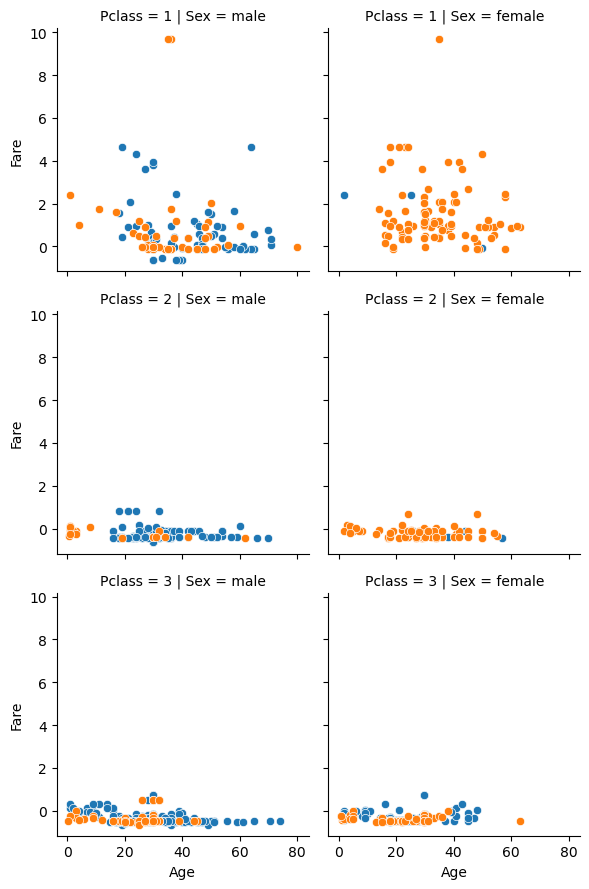

In [89]:
grid = sns.FacetGrid(data=titanic, 
              row ='Pclass', 
              col= 'Sex',
              hue = 'Survived')
grid.map(sns.scatterplot,'Age','Fare')
plt.show()

In [90]:
# sex = female 
filter1 = titanic['Sex'] == 'female'
# pclass < 3
filter2 = titanic['Pclass'] < 3

titanic['female_top_pclass'] = (filter1 & filter2) #False + True
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,female_top_pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,S,"(15, 35]",False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C,"(35, 45]",True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,S,"(15, 35]",False


- sex, female_top_pclass, adult_male, alone -> [0-1] binary encoding
- who, pclass, age_group - one-hot encoding

In [91]:
titanic['Sex'].map({'female':1, 'male':0}) #python

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [92]:
pd.get_dummies(titanic[['Embarked']])

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [93]:
titanic['Sex'] = titanic['Sex'].map({'female':1, 'male':0}) #python
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,female_top_pclass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502445,S,"(15, 35]",False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786845,C,"(35, 45]",True
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488854,S,"(15, 35]",False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420730,S,"(15, 35]",True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486337,S,"(15, 35]",False


In [94]:
# (15,35] -> 15_35 -> age_group_15_35
titanic['age_group'] = titanic['age_group'].astype(str).str.strip("(]").str.replace(', ','_') #strip replace

In [95]:
titanic_new = titanic.join(pd.get_dummies(titanic[['Embarked','age_group']]))
titanic_new.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age_group,female_top_pclass,Embarked_C,Embarked_Q,Embarked_S,age_group_0_15,age_group_15_35,age_group_35_45,age_group_45_60,age_group_60_80
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502445,...,15_35,False,False,False,True,False,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786845,...,35_45,True,True,False,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488854,...,15_35,False,False,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420730,...,15_35,True,False,False,True,False,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486337,...,15_35,False,False,False,True,False,True,False,False,False


In [96]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    int64  
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Embarked           891 non-null    object 
 11  age_group          891 non-null    object 
 12  female_top_pclass  891 non-null    bool   
 13  Embarked_C         891 non-null    bool   
 14  Embarked_Q         891 non-null    bool   
 15  Embarked_S         891 non-null    bool   
 16  age_group_0_15     891 non

In [97]:
titanic.select_dtypes('bool').columns

Index(['female_top_pclass'], dtype='object')

In [98]:
titanic_new['female_top_pclass'] =  titanic_new['female_top_pclass'].astype(int)

In [99]:
titanic_new.select_dtypes('object').columns

Index(['Name', 'Ticket', 'Embarked', 'age_group'], dtype='object')

In [107]:
titanic_new = titanic_new.drop(columns=['Embarked'])
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Sex                891 non-null    int64  
 3   Age                891 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Fare               891 non-null    float64
 7   age_group          891 non-null    object 
 8   female_top_pclass  891 non-null    int64  
 9   Embarked_C         891 non-null    bool   
 10  Embarked_Q         891 non-null    bool   
 11  Embarked_S         891 non-null    bool   
 12  age_group_0_15     891 non-null    bool   
 13  age_group_15_35    891 non-null    bool   
 14  age_group_35_45    891 non-null    bool   
 15  age_group_45_60    891 non-null    bool   
 16  age_group_60_80    891 non

### 5. Train model

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_new.drop(columns=['Survived']),
                                                   titanic_new.Survived,
                                                   random_state=42,
                                                   test_size=0.2) #0.1-0.3

In [109]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(max_iter = 1000,
                        # class_weight = 
                        # penalty = 
                        # C =
                        # solver =
                        ) # parameters
clr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [110]:
y_pred = clr.predict(x_test) #predict_proba
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [111]:
clr.predict_proba(x_test)[0]

array([0.88216426, 0.11783574])

**Confusion matrix**

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [113]:
confusion_matrix(y_test, y_pred)

array([[97,  8],
       [23, 51]])

In [116]:
accuracy_score(y_test, y_pred)

0.8268156424581006

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       105
           1       0.86      0.69      0.77        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



### ***Model is acceptable***